# Zeitreihenvorhersage mit prophet

## Dokumentation
https://facebook.github.io/prophet/docs/installation.html#python

## Daten

Bitte zuvor die folgenden Dateien in den Ordner laden:
- `Features data set.csv`
- `sales data-set.csv`
- `stores data-set.csv`
- Die Daten stammen aus folgender kaggle challenge: https://www.kaggle.com/datasets/surajjha101/stores-area-and-sales-data

## Einlesen und Vorverarbeiten der Daten

In [189]:
import pandas as pd
features = pd.read_csv('Features data set.csv')
features.dropna()
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [190]:
sale = pd.read_csv('sales data-set.csv')
sale

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


In [191]:
store = pd.read_csv('stores data-set.csv')
store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [192]:
train =  pd.merge(features,sale)
train

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50
1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27
2,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12
3,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04
4,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,93,2487.80
421566,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,94,5203.31
421567,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,95,56017.47
421568,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,97,6817.48


### Überblick über die Daten

- Vorhergesagt werden sollen die `Weekly_Sales` von verschiedenen Stores `Store`. Für jeden Store und jedes `Department` darin liegen wöchentliche Daten vor.
Hinzu kommen diverse exogene Variablen wie `Temperature`, `Fuel_Price`, `Unemployment` etc.

In [193]:
data = pd.merge(train,store,on="Store")
data


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,A,151315
1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27,A,151315
2,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12,A,151315
3,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04,A,151315
4,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,93,2487.80,B,118221
421566,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,94,5203.31,B,118221
421567,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,95,56017.47,B,118221
421568,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,97,6817.48,B,118221


### Explorative Datenanalyse mittels Korrelationsplots

- Offensichtlich sind die Größe des Stores und das Department die besten Prädiktoren für die `Weekly Sales`. Vorsicht: Bei den Departments wird eine Kategoriale Variable (Nummer es Departments) als Zahl in die Korrelationsanalyse gesetzt. Das hat nur bedingt Aussagekraft.

<AxesSubplot:>

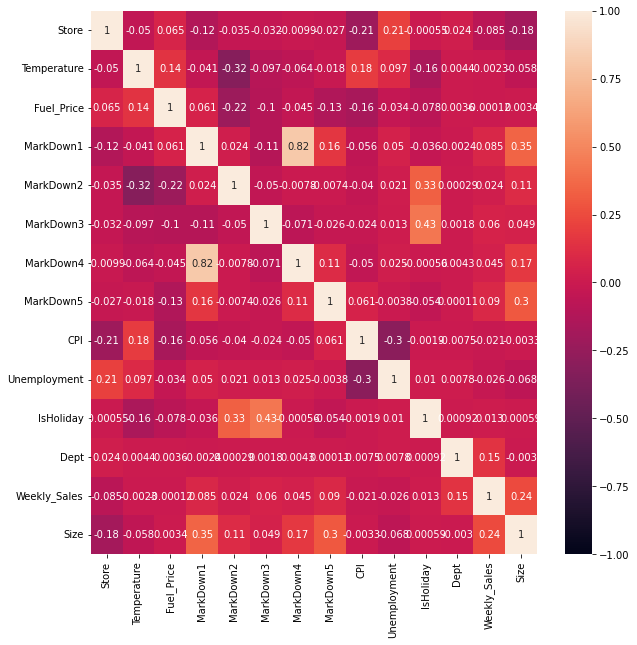

In [194]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
sns.heatmap(
    data.corr(),
    vmax=1,vmin=-1,annot=True
    )

#### Analyse für nur einen Store und ein Department

- Um solche Effekte zu vermeiden, werden die Daten auf ein Department und einen Store heruntergebrochen

In [195]:
data_one_department = data[data["Store"]==1]
data_one_department = data_one_department[data["Dept"]==1]
data_one_department

C:\Users\JLHUBER\AppData\Local\Temp\ipykernel_17464\1753131643.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_one_department = data_one_department[data["Dept"]==1]


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,A,151315
73,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,1,46039.49,A,151315
145,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,1,41595.55,A,151315
218,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,1,19403.54,A,151315
290,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,1,21827.90,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9883,1,28/09/2012,76.08,3.666,3666.27,7.64,1.65,1417.96,4744.28,222.981658,6.908,False,1,18947.81,A,151315
9956,1,05/10/2012,68.55,3.617,8077.89,NaN,18.22,3617.43,3626.14,223.181477,6.573,False,1,21904.47,A,151315
10028,1,12/10/2012,62.99,3.601,2086.18,NaN,8.11,602.36,5926.45,223.381296,6.573,False,1,22764.01,A,151315
10101,1,19/10/2012,67.97,3.594,950.33,NaN,4.93,80.25,2312.85,223.425723,6.573,False,1,24185.27,A,151315


Für diesen Spezialfall sieht man einen starken negativen Einfluss der Temperatur!

<AxesSubplot:>

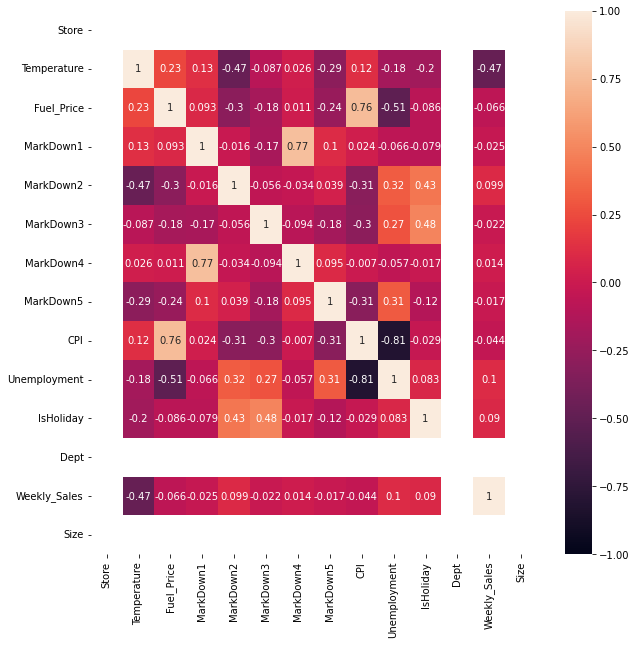

In [196]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(
    data_one_department.corr(),
    vmax=1,vmin=-1,annot=True
    )

Im Scatterplot wird deutlich, dass bei hohen Temperaturen nie hohe Verkäufe auftreten. (https://tsfresh.com/ für weitere Analysen)

array([[<AxesSubplot:xlabel='Weekly_Sales', ylabel='Weekly_Sales'>,
        <AxesSubplot:xlabel='CPI', ylabel='Weekly_Sales'>,
        <AxesSubplot:xlabel='Temperature', ylabel='Weekly_Sales'>,
        <AxesSubplot:xlabel='Fuel_Price', ylabel='Weekly_Sales'>,
        <AxesSubplot:xlabel='Unemployment', ylabel='Weekly_Sales'>],
       [<AxesSubplot:xlabel='Weekly_Sales', ylabel='CPI'>,
        <AxesSubplot:xlabel='CPI', ylabel='CPI'>,
        <AxesSubplot:xlabel='Temperature', ylabel='CPI'>,
        <AxesSubplot:xlabel='Fuel_Price', ylabel='CPI'>,
        <AxesSubplot:xlabel='Unemployment', ylabel='CPI'>],
       [<AxesSubplot:xlabel='Weekly_Sales', ylabel='Temperature'>,
        <AxesSubplot:xlabel='CPI', ylabel='Temperature'>,
        <AxesSubplot:xlabel='Temperature', ylabel='Temperature'>,
        <AxesSubplot:xlabel='Fuel_Price', ylabel='Temperature'>,
        <AxesSubplot:xlabel='Unemployment', ylabel='Temperature'>],
       [<AxesSubplot:xlabel='Weekly_Sales', ylabel='Fuel_Price'

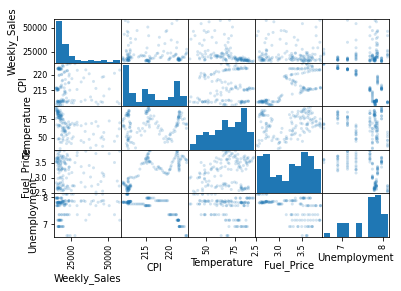

In [197]:
df_scatter = data_one_department[["Weekly_Sales","CPI","Temperature","Fuel_Price","Unemployment"]]

pd.plotting.scatter_matrix(df_scatter, alpha=0.2)

##### Analyse zeitlicher Abhängigkeiten

- Hier scheint eine Abhängigkeit (Saure-Gurken-Zeit) vorzuliegen

<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

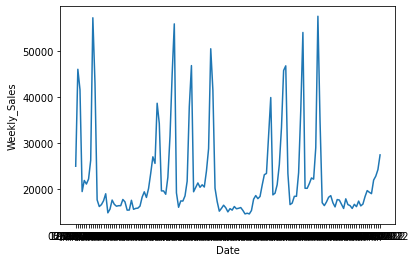

In [198]:
sns.lineplot(data=data_one_department, x="Date", y="Weekly_Sales")

Zur weiteren Analyse muss die Zeitspalte in den richtigen Datentyp übersetzt werden.

In [199]:
data_one_department["DateTime"] = pd.to_datetime(data_one_department["Date"], format = "%d/%m/%Y")


##### Absatzzahlen nach Monat und Woche

<AxesSubplot:xlabel='Month', ylabel='Weekly_Sales'>

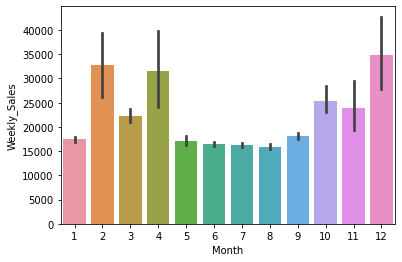

In [200]:
data_one_department["Month"] = data_one_department["DateTime"].dt.month
sns.barplot(data=data_one_department, x="Month", y="Weekly_Sales")

C:\Users\JLHUBER\AppData\Local\Temp\ipykernel_17464\1548257089.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data_one_department["Week"] = data_one_department["DateTime"].dt.week


<AxesSubplot:xlabel='Week', ylabel='Weekly_Sales'>

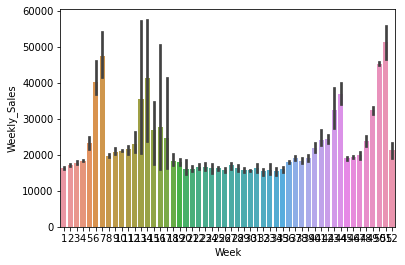

In [201]:
data_one_department["Week"] = data_one_department["DateTime"].dt.week
sns.barplot(data=data_one_department, x="Week", y="Weekly_Sales")

In [202]:
# kurzer Check, welcher Zeitliche Abstand zwischen unseren Beobachtungen liegt --> immer 7 Tage
data_one_department['time_difference_previous'] = data_one_department['DateTime'] - data_one_department['DateTime'].shift(1)
data_one_department

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,DateTime,Month,Week,time_difference_previous
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,A,151315,2010-02-05,2,5,NaT
73,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,1,46039.49,A,151315,2010-02-12,2,6,7 days
145,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,1,41595.55,A,151315,2010-02-19,2,7,7 days
218,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,1,19403.54,A,151315,2010-02-26,2,8,7 days
290,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,1,21827.90,A,151315,2010-03-05,3,9,7 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9883,1,28/09/2012,76.08,3.666,3666.27,7.64,1.65,1417.96,4744.28,222.981658,6.908,False,1,18947.81,A,151315,2012-09-28,9,39,7 days
9956,1,05/10/2012,68.55,3.617,8077.89,NaN,18.22,3617.43,3626.14,223.181477,6.573,False,1,21904.47,A,151315,2012-10-05,10,40,7 days
10028,1,12/10/2012,62.99,3.601,2086.18,NaN,8.11,602.36,5926.45,223.381296,6.573,False,1,22764.01,A,151315,2012-10-12,10,41,7 days
10101,1,19/10/2012,67.97,3.594,950.33,NaN,4.93,80.25,2312.85,223.425723,6.573,False,1,24185.27,A,151315,2012-10-19,10,42,7 days


##### Analyse der Autokorrelation

- Offensichtlicher Peak bei 52 Wochen --> Entspricht Jährlich wiederkehrendem Muster
- Erklärung für ~7 Wochen?
- Spannend wäre ggf. erneute Analyse nach Entfernen der Saisonalität (z.B. Wochendurchschnitt abziehen). Dann könnte z.B. deutlich werden, ob vorgezogene Käufe einen Einfluss haben (negative Korrelation bei einer Woche)

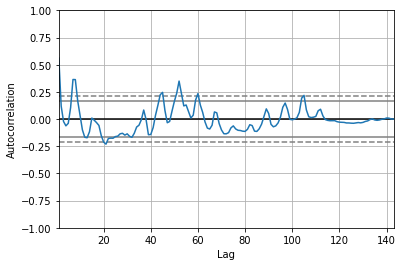

In [203]:
# Creating Autocorrelation plot
x = pd.plotting.autocorrelation_plot(data_one_department["Weekly_Sales"])
 
# plotting the Curve
x.plot()
 
# Display
plt.show()

## Prognose als reines Zeitreihenmodell

- offensichtlich könnte hier ein reines Zeitreihen Modell funktionieren
- Einfach quick and dirty mittels prophet umgesetzt
- Hierzu muss ein neuer dataframe `df3` mit mit den Spalten `ds` für Zeitpunkt und `y` für die Predicted Variable erzeugt werden.

In [204]:
df3 = data_one_department[["Date","Weekly_Sales"]]
df3.rename(columns={"Date":"ds"}, inplace=True)
df3.rename(columns={"Weekly_Sales":"y"}, inplace=True)

df3.head()

C:\Users\JLHUBER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,ds,y
0,05/02/2010,24924.50
73,12/02/2010,46039.49
145,19/02/2010,41595.55
218,26/02/2010,19403.54
290,05/03/2010,21827.90


In [205]:
# Convert 'ds' column to datetime format
df3['ds'] = pd.to_datetime(df3['ds'], format='%d/%m/%Y')
df3

C:\Users\JLHUBER\AppData\Local\Temp\ipykernel_17464\3297021580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['ds'] = pd.to_datetime(df3['ds'], format='%d/%m/%Y')


,ds,y
0,2010-02-05,24924.50
73,2010-02-12,46039.49
145,2010-02-19,41595.55
218,2010-02-26,19403.54
290,2010-03-05,21827.90
...,...,...
9883,2012-09-28,18947.81
9956,2012-10-05,21904.47
10028,2012-10-12,22764.01
10101,2012-10-19,24185.27


In [206]:
from prophet import Prophet
# Definition des Modells: ohne Anpassungen
m = Prophet()

# Training des Modells auf dem Gesamten Data-Frame 
m.fit(df3)

# Erzeugen eines Dataframes für die zukünftigen Zeitpunkte
future = m.make_future_dataframe(periods=52,freq = "W")
future.tail()

15:51:16 - cmdstanpy - INFO - Chain [1] start processing
15:51:16 - cmdstanpy - INFO - Chain [1] done processing


,ds
190,2013-09-22
191,2013-09-29
192,2013-10-06
193,2013-10-13
194,2013-10-20


In [207]:
# Anfertigen der Prognose aus Modell
forecast = m.predict(future)
forecast.head() # yhat ist die Prognose

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-02-05,22412.088682,24184.629166,39471.508669,22412.088682,22412.088682,9291.338873,9291.338873,9291.338873,9291.338873,9291.338873,9291.338873,0.0,0.0,0.0,31703.427555
1,2010-02-12,22416.893893,30433.982920,45287.895544,22416.893893,22416.893893,15292.602742,15292.602742,15292.602742,15292.602742,15292.602742,15292.602742,0.0,0.0,0.0,37709.496635
2,2010-02-19,22421.699104,28863.879348,43768.451867,22421.699104,22421.699104,13990.524965,13990.524965,13990.524965,13990.524965,13990.524965,13990.524965,0.0,0.0,0.0,36412.224069
3,2010-02-26,22426.504314,20853.126328,36018.276721,22426.504314,22426.504314,6092.181300,6092.181300,6092.181300,6092.181300,6092.181300,6092.181300,0.0,0.0,0.0,28518.685615
4,2010-03-05,22431.309525,12188.226479,27007.020689,22431.309525,22431.309525,-2917.147971,-2917.147971,-2917.147971,-2917.147971,-2917.147971,-2917.147971,0.0,0.0,0.0,19514.161554


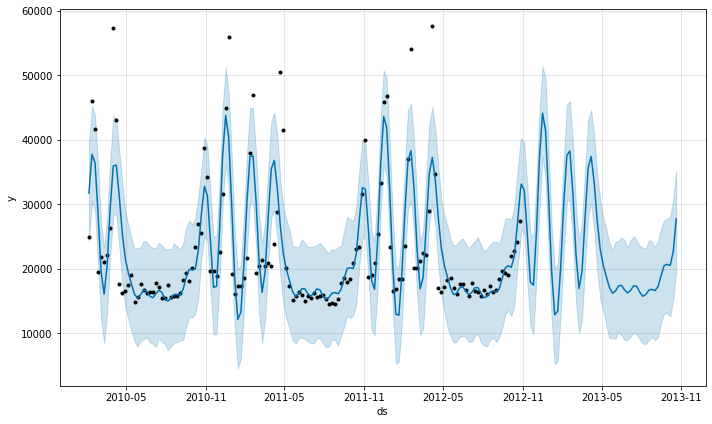

In [208]:
fig1 = m.plot(forecast)

### Prognose mit sinnvoller Cross-validation

- https://facebook.github.io/prophet/docs/diagnostics.html
- Nutze das Modell m
- Trainiere es es auf mindestens den ersten 52 Wochen
- Sage dann jede Woche
- die nächsten drei Wochen vor raus

In [209]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='52 W', period='1 W', horizon = '3 W')


Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/88 [00:00<?, ?it/s]15:51:17 - cmdstanpy - INFO - Chain [1] start processing
15:51:18 - cmdstanpy - INFO - Chain [1] done processing
  1%|          | 1/88 [00:00<00:57,  1.51it/s]15:51:18 - cmdstanpy - INFO - Chain [1] start processing
15:51:18 - cmdstanpy - INFO - Chain [1] done processing
  2%|▏         | 2/88 [00:01<00:51,  1.66it/s]15:51:18 - cmdstanpy - INFO - Chain [1] start processing
15:51:19 - cmdstanpy - INFO - Chain [1] done processing
  3%|▎         | 3/88 [00:01<00:50,  1.70it/s]15:51:19 - cmdstanpy - INFO - Chain [1] start processing
15:51:20 - cmdstanpy - INFO - Chain [1] done processing
  5%|▍         | 4/88 [00:02<00:57,  1.47it/s]15:51:20 - cmdstanpy - INFO - Chain [1] start processing
15:51:20 - cmdstanpy - INFO - Chain [1] done processing
  6%|▌         | 5/88 [00:03<00:56,  1.48it/s]15:51:20 - cmdstanpy - INFO - Chain [1] start processing
15:51:

In [210]:
df_cv.head(15)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2011-02-11,31456.962124,25468.174986,38135.563823,37887.17,2011-02-04
1,2011-02-18,32646.093002,26247.173672,39087.082739,46845.87,2011-02-04
2,2011-02-25,25829.104065,18792.770805,31983.153692,19363.83,2011-02-04
3,2011-02-18,37526.445178,31606.585960,43795.585920,46845.87,2011-02-11
4,2011-02-25,30391.793980,24709.432408,36770.169373,19363.83,2011-02-11
5,2011-03-04,18958.871897,12747.027649,25169.467242,20327.61,2011-02-11
6,2011-02-25,35556.300928,29151.667742,41724.460741,19363.83,2011-02-18
7,2011-03-04,23401.101896,17054.016755,29495.848258,20327.61,2011-02-18
8,2011-03-11,16894.477457,10599.976325,23564.555332,21280.40,2011-02-18
9,2011-03-04,16129.175035,9553.834843,22560.111544,20327.61,2011-02-25


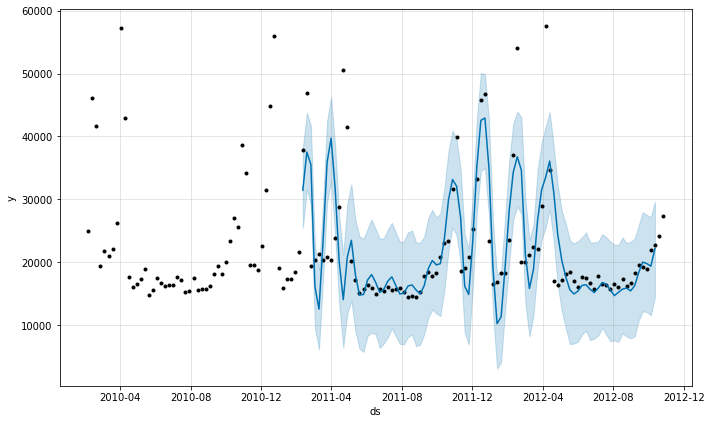

In [211]:
# Plot nur for Prognosehorizont von einer Woche
one_horizon = df_cv.copy()
one_horizon["Horizon"] = one_horizon["ds"]-one_horizon["cutoff"] 
one_horizon = one_horizon[one_horizon["Horizon"]=="7 days"]
fig2 = m.plot(one_horizon)

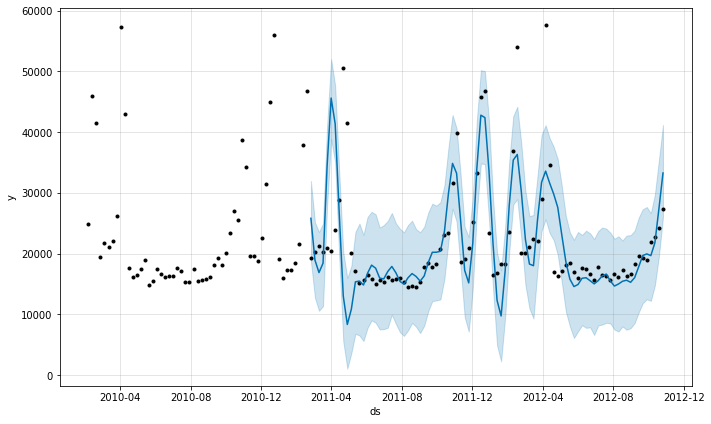

In [212]:
# Plot nur for Prognosehorizont von drei Wochen

one_horizon = df_cv.copy()
one_horizon["Horizon"] = one_horizon["ds"]-one_horizon["cutoff"] 
one_horizon = one_horizon[one_horizon["Horizon"]=="21 days"]
fig2 = m.plot(one_horizon)

#### Fehlermetriken

- Der mean absolute percent error (MAPE) liegt bei knapp unter 20%
- Hier wäre jetzt eine tiefere Fehleranalyse spannend: Wann treten die Fehler genau auf und warum --> Was Nutzt das Modell noch nicht als Info.

In [213]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,7 days,5.713512e+07,7558.777812,4425.204068,0.179648,0.100044,0.175999,0.806818
1,14 days,7.040067e+07,8390.510797,4783.076479,0.193325,0.108098,0.192992,0.829545
2,21 days,6.569523e+07,8105.259130,4512.026227,0.185049,0.104157,0.184393,0.852273


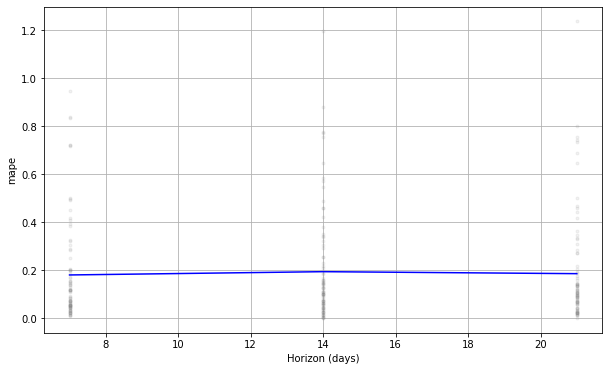

In [214]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

## Prognose als  Zeitreihenmodell mit zusätzlichen externen Variablen

- In diesem Fall kann das Modell die zusätzlichen Variablen nicht sinnvoll nutzen. Der MAPE steigt.

In [215]:
df4 = data_one_department[["Date","Weekly_Sales","Temperature","CPI","Fuel_Price","Unemployment"]]
df4.rename(columns={"Date":"ds"}, inplace=True)
df4.rename(columns={"Weekly_Sales":"y"}, inplace=True)
df4['ds'] = pd.to_datetime(df4['ds'], format='%d/%m/%Y')
df4.head()

C:\Users\JLHUBER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\JLHUBER\AppData\Local\Temp\ipykernel_17464\2191651682.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['ds'] = pd.to_datetime(df4['ds'], format='%d/%m/%Y')


,ds,y,Temperature,CPI,Fuel_Price,Unemployment
0,2010-02-05,24924.50,42.31,211.096358,2.572,8.106
73,2010-02-12,46039.49,38.51,211.242170,2.548,8.106
145,2010-02-19,41595.55,39.93,211.289143,2.514,8.106
218,2010-02-26,19403.54,46.63,211.319643,2.561,8.106
290,2010-03-05,21827.90,46.50,211.350143,2.625,8.106


In [216]:
# Definition des Modells: ohne Anpassungen
m = Prophet()

# Training des Modells auf dem Gesamten Data-Frame 
m.add_regressor('Temperature')
m.add_regressor('CPI')
m.add_regressor('Fuel_Price')
m.add_regressor('Unemployment')
m.fit(df4)


15:52:08 - cmdstanpy - INFO - Chain [1] start processing
15:52:08 - cmdstanpy - INFO - Chain [1] done processing


In [217]:
df_cv_ext = cross_validation(m, initial='52 W', period='1 W', horizon = '3 W')

df_p_ext = performance_metrics(df_cv_ext)
df_p_ext.head()

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/88 [00:00<?, ?it/s]15:52:09 - cmdstanpy - INFO - Chain [1] start processing
15:52:09 - cmdstanpy - INFO - Chain [1] done processing
  1%|          | 1/88 [00:00<00:46,  1.86it/s]15:52:10 - cmdstanpy - INFO - Chain [1] start processing
15:52:10 - cmdstanpy - INFO - Chain [1] done processing
  2%|▏         | 2/88 [00:01<00:59,  1.44it/s]15:52:10 - cmdstanpy - INFO - Chain [1] start processing
15:52:11 - cmdstanpy - INFO - Chain [1] done processing
  3%|▎         | 3/88 [00:01<00:52,  1.62it/s]15:52:11 - cmdstanpy - INFO - Chain [1] start processing
15:52:11 - cmdstanpy - INFO - Chain [1] done processing
  5%|▍         | 4/88 [00:02<00:54,  1.53it/s]15:52:12 - cmdstanpy - INFO - Chain [1] start processing
15:52:12 - cmdstanpy - INFO - Chain [1] done processing
  6%|▌         | 5/88 [00:03<00:52,  1.60it/s]15:52:12 - cmdstanpy - INFO - Chain [1] start processing
15:52:

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,7 days,9.251983e+07,9618.723110,5645.991984,0.231781,0.115310,0.268665,0.772727
1,14 days,1.718926e+08,13110.783667,6991.950709,0.284841,0.146221,0.341351,0.772727
2,21 days,2.200436e+08,14833.865485,7636.188019,0.330034,0.157969,0.379435,0.738636


## Prognose als zeit-agnostisches Modell

Folgendes Random-Forrest Modell enthält als Zeitinformation nur die jeweilige Woche, aber keine Auto-Regressiven Teile, dafür aver diverse externe Variablen. Der MAPE beträgt ebenfalls 19%. Allerdings sind die Ergebnisse nur bedingt vergleichbar. Da hier der Split der Trainings- und Test-Daten zufällig über den Zeitbereich erfolgt ist.

In [218]:
df4 = data_one_department[["Date","Weekly_Sales","Temperature","CPI","Fuel_Price","Unemployment"]]
df4.rename(columns={"Date":"ds"}, inplace=True)
df4.rename(columns={"Weekly_Sales":"y"}, inplace=True)
df4['ds'] = pd.to_datetime(df4['ds'], format='%d/%m/%Y')
df4['week'] = df4['ds'].dt.week
df4.head()

C:\Users\JLHUBER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\JLHUBER\AppData\Local\Temp\ipykernel_17464\2504956530.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['ds'] = pd.to_datetime(df4['ds'], format='%d/%m/%Y')
C:\Users\JLHUBER\AppData\Local\Temp\ipykernel_17464\2504956530.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Se

,ds,y,Temperature,CPI,Fuel_Price,Unemployment,week
0,2010-02-05,24924.50,42.31,211.096358,2.572,8.106,5
73,2010-02-12,46039.49,38.51,211.242170,2.548,8.106,6
145,2010-02-19,41595.55,39.93,211.289143,2.514,8.106,7
218,2010-02-26,19403.54,46.63,211.319643,2.561,8.106,8
290,2010-03-05,21827.90,46.50,211.350143,2.625,8.106,9


In [219]:
# Using Skicit-learn to split data into training and testing sets
!pip install scikit-learn
from sklearn.model_selection import train_test_split

labels = df4["y"]
features = df4[["Temperature", "CPI", "Fuel_Price", "Unemployment", "week"]]
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [220]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [221]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(test_labels, predictions)

0.18993280593516126